Module 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt

Module 2: Load and Explore Data

In [ ]:
# Load the dataset
df = pd.read_csv("bank-full.csv")
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values if any
df.dropna(inplace=True)  # Example: Dropping rows with missing values

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

Module 3: Data Preprocessing

In [ ]:
# Assume 'y' is the target variable (subscription), and 'X' is the feature set
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Module 4: Build and Train Logistic Regression Model

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Module 5: Make Predictions and Evaluate Model

Confusion Matrix:
 [[7755  197]
 [ 719  372]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



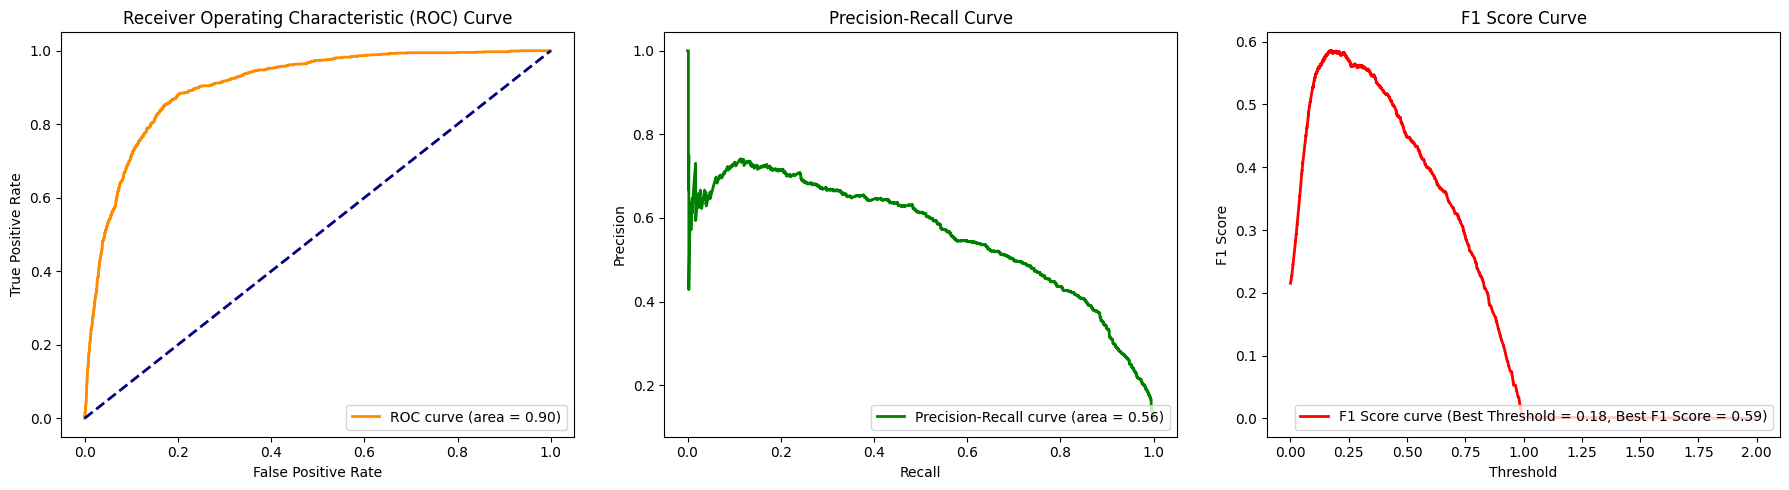

Accuracy Score: 0.8987061815769103


In [ ]:
# Import necessary functions
from sklearn.metrics import precision_recall_curve, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC Curve and AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# F1 Score Curve
f1_scores = [f1_score(y_test, y_prob >= threshold) for threshold in thresholds]

# Find the threshold corresponding to the maximum F1 Score
best_f1_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

# Plot ROC Curve, Precision-Recall Curve, and F1 Score Curve
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

plt.subplot(1, 3, 3)
plt.plot(thresholds, f1_scores, color='red', lw=2, label='F1 Score curve (Best Threshold = {:.2f}, Best F1 Score = {:.2f})'.format(best_f1_threshold, best_f1_score))
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

